In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import math
from collections import Counter

import ns
import history_cmc as hic
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import json
import scripts
import scripts1
import scripts2
import scripts3
import dynamics as dyn

import ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import ns_tidalcapture as tc

matplotlib.rcParams.update({'font.size': 24})
      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
Gconst_sun = 4.30091*10**-3 ##pc*M_sun**-1*(km/s)2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
AU_Rsun=214.93946938362 ##AU to R_sun
PC=3.086*10**18  ##cm
PC_Rsun = 44334448.0068964 ##pc to R_sun
PC_AU = 206265 ##pc to AU

/projects/b1095/syr904/MyCodes/PythonCodes/ns.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/software/anaconda3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/software/anaconda3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/software/anaconda3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().st

In [24]:
##Extract data

##Field HE WD pulsars
df_hewds = pd.read_excel('/projects/b1095/syr904/projects/PULSAR/data_observed/field_hewds.xlsx', skiprows = 1, 
                         names = ['Nos', 'Name','P0', 'P1', 'PB', 'Ecc', 'MinMass', 'MedMass', 'BinComp', 'Age', 'Bsurf'])

##COSMIC run HE WD pulsars
conv = pd.read_hdf('/projects/b1095/syr904/cosmic/cosmicpop_1310_z0.002/dat_kstar1_13_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.002.h5', 
                   key='conv')
bcm = pd.read_hdf('/projects/b1095/syr904/cosmic/cosmicpop_1310_z0.002/dat_kstar1_13_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.002.h5', 
                   key='bcm')
bpp = pd.read_hdf('/projects/b1095/syr904/cosmic/cosmicpop_1310_z0.002/dat_kstar1_13_kstar2_10_SFstart_13700.0_SFduration_0.0_metallicity_0.002.h5', 
                   key='bpp')

binname = bcm.index.values
print(binname)
print(len(binname), len(bcm))
print(bpp.loc[3281])
print(bcm.loc[3281])
#729 3281 32635

k2 = bcm['kstar_2']; k1 = bcm['kstar_1']
np.any(k2 == 11)


[      3     222     344 ... 2469762 2469795 2469885]
23741 23741
             tphys    mass_1    mass_2  kstar_1  kstar_2          sep  \
3281      0.000000  4.733777  3.892805      1.0      1.0  1291.706487   
3281    106.758923  4.731938  3.892501      2.0      1.0  1292.027300   
3281    107.296063  4.731261  3.892507      3.0      1.0  1139.741257   
3281    107.335375  4.731098  3.892513      3.0      1.0   198.950940   
3281    107.335375  4.731098  3.892513      3.0      1.0   198.950940   
3281    107.335375  0.801074  3.892513      7.0      1.0     6.493040   
3281    107.335375  0.801074  3.892513      7.0      1.0     6.493040   
3281    111.650712  0.800989  3.892502      7.0      1.0     5.203517   
3281    121.507578  3.618083  1.026249      8.0      1.0     3.519859   
3281    121.669635  3.601514  1.019291      8.0      1.0     3.944656   
3281    121.669635  1.277584  1.019291     13.0      1.0     9.490904   
3281    121.669635  1.277584  1.019291     13.0      1.0  

False

119


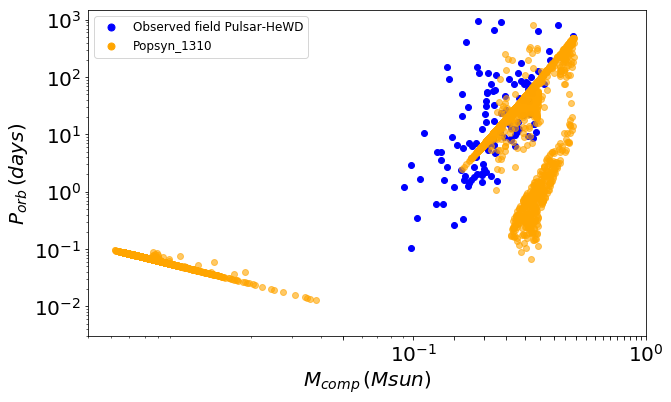

In [26]:
##Comparing the cosmic pop with observed HE WD systems
odot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='o',
                  markersize=7, label='Popsyn_1310')
bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, label='Observed field Pulsar-HeWD')

matplotlib.rcParams.update({'font.size': 20})

medmass = df_hewds['MedMass']; porb = df_hewds['PB']
print(len(medmass))
mass_comp_cp = bcm['mass_2']; porb_cp = bcm['porb']

x_mass = np.linspace(0.2, 0.5, 200)
y_pb = (x_mass-0.115)**4.75*1.1*10**5/10

fig, ax = plt.subplots(figsize=(10, 6))
for ii in range(len(medmass)):
    if medmass[ii]!='*' and porb[ii]!='*':
        ax.scatter(medmass[ii], porb[ii], color = 'b')

ax.scatter(mass_comp_cp, porb_cp, color = 'orange', alpha=0.6)
#ax.plot(x_mass, y_pb)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(ymin = 0.003)
ax.set_xlim(xmin = 0.004, xmax = 1)
ax.set_xlabel(r'$M_{comp}\,(Msun)$')
ax.set_ylabel(r'$P_{orb}\,(days)$')

tick_spacing = 0.05
ax.legend(handles=[bdot, odot], loc='best', prop={'size': 12}, numpoints=1, frameon=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars


19751 3633 357
19751 3633 357
729 3281 32635
[(1.0, 570), (2.0, 3089), (4.0, 16092)] [(1.0, 1243), (2.0, 1182), (4.0, 1208)] [(1.0, 31), (2.0, 314), (4.0, 12)]


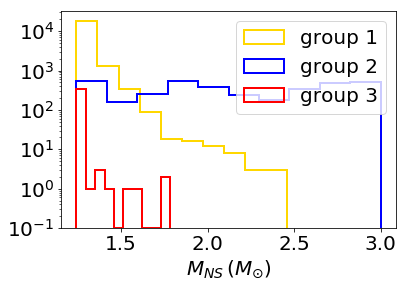

In [23]:
##Check the final differences between the three populations as shown above
m_comp_cp = np.array(bcm['mass_2']); m_ns_cp = np.array(bcm['mass_1']); porb_cp = np.array(bcm['porb'])
SN_ns = np.array(bcm['SN_1'])

g1_mns = []; g2_mns = []; g3_mns = []
g1_SNns = []; g2_SNns = []; g3_SNns = []
group_name = [[],[],[]]; group_sn_ns = [[],[],[]]
for xx in range(len(m_ns_cp)):
    y_pb = (m_comp_cp[xx]-0.115)**4.75*1.1*10**5/10
    if m_comp_cp[xx]<0.1:
        g1_mns.append(m_ns_cp[xx])
        g1_SNns.append(SN_ns[xx])
        group_name[0].append(binname[xx])
        group_sn_ns[0].append(SN_ns[xx])
    elif porb_cp[xx]>y_pb:
        g2_mns.append(m_ns_cp[xx])
        g2_SNns.append(SN_ns[xx])
        group_name[1].append(binname[xx])
        group_sn_ns[1].append(SN_ns[xx])
    else:
        g3_mns.append(m_ns_cp[xx])
        g3_SNns.append(SN_ns[xx])
        group_name[2].append(binname[xx])
        group_sn_ns[2].append(SN_ns[xx])

print(len(g1_mns), len(g2_mns), len(g3_mns))
print(len(group_name[0]), len(group_name[1]), len(group_name[2]))
print(group_name[0][5], group_name[1][5],group_name[2][5])


##NS mass distrubution
plt.figure()
plt.hist(g1_mns, log=True, bins = 10, histtype = 'step', lw = 2, label = 'group 1', color='gold')
plt.hist(g2_mns, log=True, bins = 10, histtype = 'step', lw = 2, label = 'group 2', color='b')
plt.hist(g3_mns, log=True, bins = 10, histtype = 'step', lw = 2, label = 'group 3', color='r')
plt.xlabel(r'$M_{NS}\, (M_{\odot})$')
plt.legend(loc='best')


##NS SN channels
g1_counter = sorted(Counter(g1_SNns).items())
g2_counter = sorted(Counter(g2_SNns).items())
g3_counter = sorted(Counter(g3_SNns).items())
print(g1_counter, g2_counter, g3_counter)

0.1737633537542403 0.7886689281555365 0.03756771809022328 0.0

0.0 0.4682080924855491 0.5218827415359207 0.00990916597853014

0.0028011204481792717 0.9831932773109243 0.014005602240896359 0.0



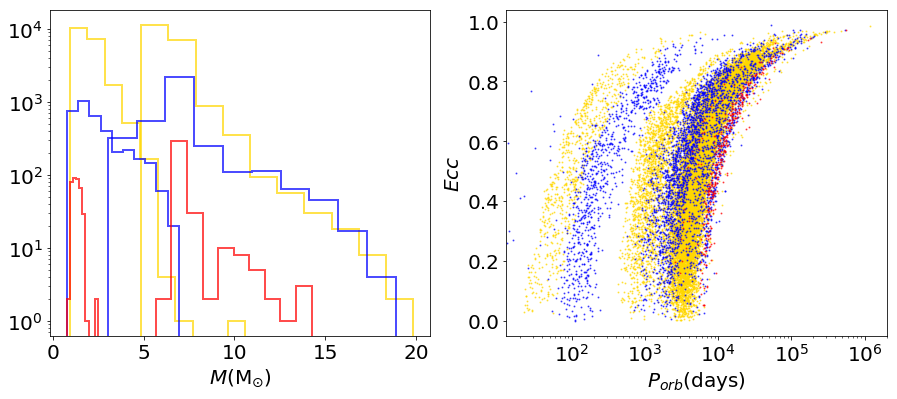

In [27]:
##Check common-envelope of the three populations

##Separate as three groups as shown above
m1_init = [[],[],[]]; k1_init = [[],[],[]]
m2_init = [[],[],[]]; k2_init = [[],[],[]]
porb_init = [[],[],[]]; ecc_init = [[],[],[]]
ce = [[],[],[]]; mt = [[],[],[]]

for xx in range(len(binname)):
    bpp_bin = bpp.loc[binname[xx]]
    
    k1_bpp = np.array(bpp_bin['kstar_1']); k2_bpp = np.array(bpp_bin['kstar_2'])
    porb_bpp = np.array(bpp_bin['porb']); ecc_bpp = np.array(bpp_bin['ecc'])
    t_bpp = np.array(bpp_bin['tphys']); evtype_bpp = np.array(bpp_bin['evol_type'])
    m1_bpp = np.array(bpp_bin['mass_1']); m2_bpp = np.array(bpp_bin['mass_2'])
    
    for m in range(3):
        if binname[xx] in group_name[m]:
            k1_init[m].append(k1_bpp[0]); k2_init[m].append(k2_bpp[0])
            m1_init[m].append(m1_bpp[0]); m2_init[m].append(m2_bpp[0])
            porb_init[m].append(porb_bpp[0]); ecc_init[m].append(ecc_bpp[0])
                    
            ce_temp=0; mt_temp=0
            for ii in range(len(evtype_bpp)):
                if evtype_bpp[ii]==7:
                    ce_temp+=1
                if evtype_bpp[ii]==3:
                    mt_temp+=1
                    
            ce[m].append(ce_temp); mt[m].append(mt_temp)

cs=['gold','b','r']
fig, ax=plt.subplots(ncols=2, figsize=(15,6))
for m in range(3):
    ce[m]=np.array(ce[m]); mt[m]=np.array(mt[m])
    print(len(ce[m][ce[m]>2])/len(ce[m]), len(ce[m][ce[m]==2])/len(ce[m]), len(ce[m][ce[m]==1])/len(ce[m]), len(ce[m][ce[m]==0])/len(ce[m]))
    print()

    ax[0].hist(m1_init[m], histtype='step', color=cs[m], alpha=0.7, lw=2)
    ax[0].hist(m2_init[m], histtype='step', color=cs[m], alpha=0.7, lw=2)
    
    ax[1].scatter(porb_init[m], ecc_init[m], alpha=0.6, s=1, color=cs[m])
    
ax[0].set_xlabel(r'$M(\rm{M_{\odot}})$')
ax[0].set_yscale('log')

ax[1].set_xlabel(r'$P_{orb}(\rm{days})$')
ax[1].set_ylabel(r'$Ecc$')
ax[1].set_xscale('log')

19751 3633 357
Counter({10.0: 14236, 1.0: 3649, 7.0: 1795, 2.0: 61, 3.0: 10}) Counter({1.0: 2648, 3.0: 532, 2.0: 453}) Counter({1.0: 345, 3.0: 11, 2.0: 1})


Text(0.5,0,'$M_{NS}\\,(M_{\\odot})$')

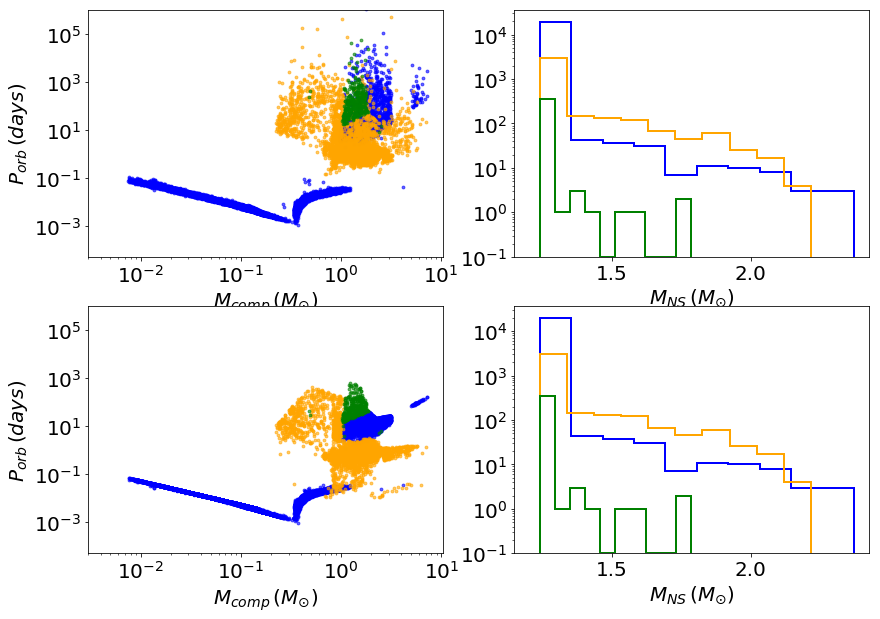

In [16]:
##Check the initial differences between the three populations as shown above

##Separate as three groups as shown above
m1_init = [[[],[],[]],[[],[],[]]]; k1_init = [[[],[],[]],[[],[],[]]]
m2_init = [[[],[],[]],[[],[],[]]]; k2_init = [[[],[],[]],[[],[],[]]]
porb_init = [[[],[],[]],[[],[],[]]]; ecc_init = [[[],[],[]],[[],[],[]]]
t_init = [[[],[],[]],[[],[],[]]]

for xx in range(len(binname)):
    bpp_bin = bpp.loc[binname[xx]]
    
    k1_bpp = np.array(bpp_bin['kstar_1']); k2_bpp = np.array(bpp_bin['kstar_2'])
    porb_bpp = np.array(bpp_bin['porb']); ecc_bpp = np.array(bpp_bin['ecc'])
    t_bpp = np.array(bpp_bin['tphys']); evtype_bpp = np.array(bpp_bin['evol_type'])
    m1_bpp = np.array(bpp_bin['mass_1']); m2_bpp = np.array(bpp_bin['mass_2'])
    
    for m in range(3):
        if binname[xx] in group_name[m]:
            for i in range(len(k1_bpp)):
                if k1_bpp[i]==13.:
                    k1_init[0][m].append(k1_bpp[i]); k2_init[0][m].append(k2_bpp[i])
                    m1_init[0][m].append(m1_bpp[i]); m2_init[0][m].append(m2_bpp[i])
                    porb_init[0][m].append(porb_bpp[i]); ecc_init[0][m].append(ecc_bpp[i])
                    t_init[0][m].append(t_bpp[i])
                    break
                
            for j in range(len(evtype_bpp)):
                if k1_bpp[j]==13. and evtype_bpp[j]==3:
                    k1_init[1][m].append(k1_bpp[j]); k2_init[1][m].append(k2_bpp[j])
                    m1_init[1][m].append(m1_bpp[j]); m2_init[1][m].append(m2_bpp[j])
                    porb_init[1][m].append(porb_bpp[j]); ecc_init[1][m].append(ecc_bpp[j])
                    t_init[1][m].append(t_bpp[j])
                    break
                
print(len(m1_init[0][0]), len(m1_init[0][1]), len(m1_init[0][2]))
print(Counter(k2_init[0][0]), Counter(k2_init[0][1]), Counter(k2_init[0][2]))
 
cs = ['b', 'orange', 'g']
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))
for n in range(3):
    #print(k2_init[0][n])
    axs[0][0].scatter(m2_init[0][n], porb_init[0][n], s = 8, alpha=0.6, c = cs[n])
    axs[0][1].hist(m1_init[0][n], log=True, bins = 10, histtype = 'step', lw = 2, color = cs[n])
    axs[1][0].scatter(m2_init[1][n], porb_init[1][n], s = 8, alpha=0.6, c = cs[n])
    axs[1][1].hist(m1_init[1][n], log=True, bins = 10, histtype = 'step', lw = 2, color = cs[n])


axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].set_xlim(xmin = 0.003)
axs[0][0].set_ylim(ymin = 0.00005, ymax = 10**6)
axs[0][0].set_xlabel(r'$M_{comp}\,(M_{\odot})$')
axs[0][0].set_ylabel(r'$P_{orb}\,(days)$')

axs[0][1].set_xlim(xmin = 1.15)
axs[0][1].set_xlabel(r'$M_{NS}\,(M_{\odot})$')

axs[1][0].set_xscale('log')
axs[1][0].set_yscale('log')
axs[1][0].set_xlim(xmin = 0.003)
axs[1][0].set_ylim(ymin = 0.00005, ymax = 10**6)
axs[1][0].set_xlabel(r'$M_{comp}\,(M_{\odot})$')
axs[1][0].set_ylabel(r'$P_{orb}\,(days)$')

axs[1][1].set_xlim(xmin = 1.15)
axs[1][1].set_xlabel(r'$M_{NS}\,(M_{\odot})$')

3089 1182 314
16092 1208 12
[1750, 3016, 3420, 8539, 19485, 22577, 24749, 26040, 27356, 28858, 29727, 30093, 31147, 36690, 38362, 39724, 40187, 41270, 41711, 41728, 42914, 44171, 44715, 44845, 45628, 45986, 48192, 50195, 50834, 52427, 56474, 57285, 57316, 58916, 62960, 64202, 64645, 67259, 69272, 75271, 79695, 80482, 81031, 81270, 86762, 88203, 89977, 90710, 91712, 91769, 93401, 98086, 98780, 99638, 101168, 103486, 108039, 109539, 109840, 111184, 111468, 112074, 114326, 117025, 140456, 142722, 144073, 145098, 149088, 149287, 149709, 153520, 159018, 159651, 163528, 165167, 167411, 167785, 168795, 169530, 169875, 175689, 176164, 176462, 179290, 180636, 185630, 188069, 189748, 189899, 191050, 193586, 195993, 197359, 198708, 204315, 205614, 210799, 211481, 211821, 215003, 217243, 219754, 223444, 223891, 227914, 228554, 239859, 245478, 248249, 251089, 253146, 253583, 254522, 255772, 256623, 258944, 259243, 262172, 263432, 264544, 264852, 268784, 269068, 269943, 270655, 275786, 278781, 28126

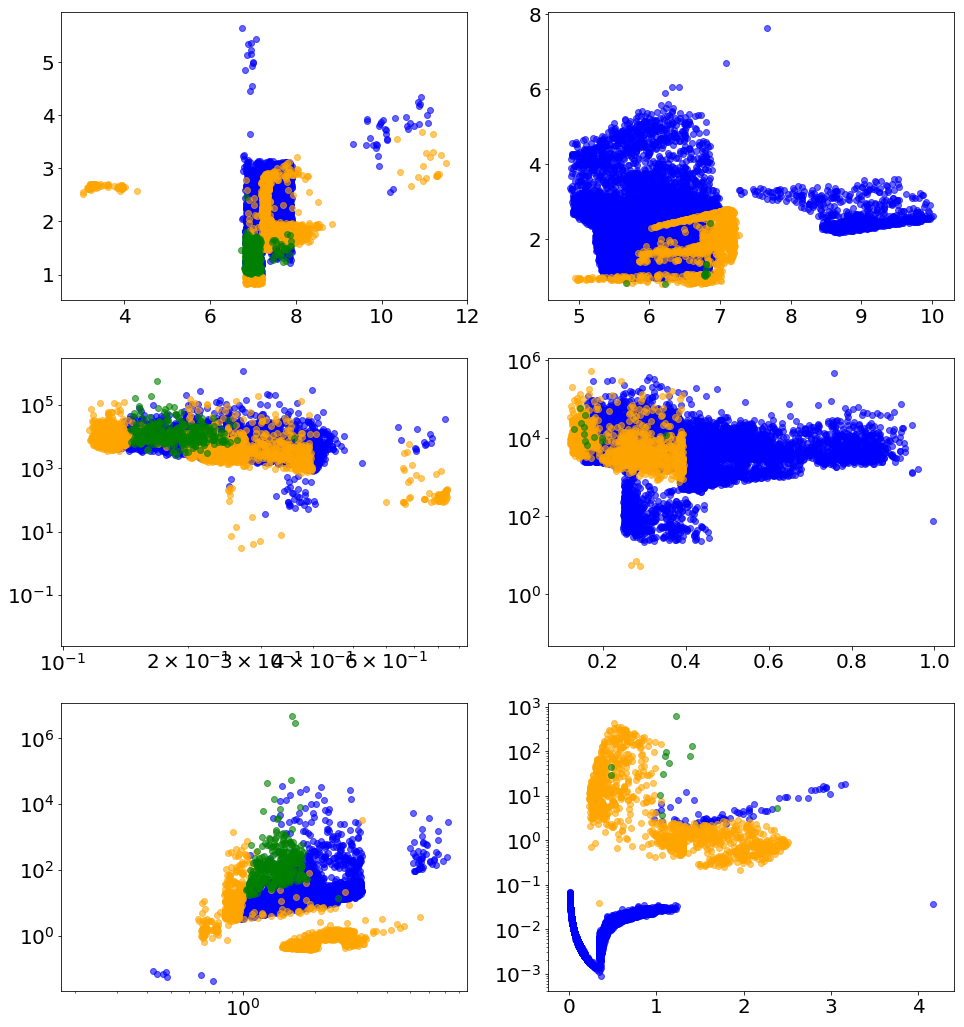

In [19]:
##Look at ECSN and AIC NSs specifically
name_eic = [[],[],[]]; name_aic = [[],[],[]]
for i in range(3):
    for j in range(len(group_sn_ns[i])):
        if group_sn_ns[i][j] == 2.0:
            name_eic[i].append(group_name[i][j])
        if group_sn_ns[i][j] == 4.0:
            name_aic[i].append(group_name[i][j])
    
print(len(name_eic[0]), len(name_eic[1]), len(name_eic[2]))
print(len(name_aic[0]), len(name_aic[1]), len(name_aic[2]))
print(name_aic[1])

m1_eic = [[],[],[]]; m2_eic = [[],[],[]]; porb_eic_init = [[],[],[]];
cs = ['b', 'orange', 'g']
fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (16,18))
for xx in range(3):
    for jj in range(len(name_eic[xx])):
        #print(name_eic[xx][jj])
        bpp_bin = bpp.loc[name_eic[xx][jj]]
        #print(bpp_bin)
    
        k1_bpp = np.array(bpp_bin['kstar_1']); k2_bpp = np.array(bpp_bin['kstar_2'])
        porb_bpp = np.array(bpp_bin['porb']); ecc_bpp = np.array(bpp_bin['ecc'])
        t_bpp = np.array(bpp_bin['tphys']); evtype_bpp = np.array(bpp_bin['evol_type'])
        m1_bpp = np.array(bpp_bin['mass_1']); m2_bpp = np.array(bpp_bin['mass_2'])
        
        if m1_bpp[0] > m2_bpp[0]:
            axs[0][0].scatter(m1_bpp[0], m2_bpp[0], color = cs[xx], alpha=0.6)
        else:
            axs[0][0].scatter(m2_bpp[0], m1_bpp[0], color = cs[xx], alpha=0.6)
            
        axs[1][0].scatter(m2_bpp[0]/m1_bpp[0], porb_bpp[0], color = cs[xx], alpha=0.6)
            
        for m in range(len(k1_bpp)):
            if k1_bpp[m]==13.:# and evtype_bpp[m]==3:
                axs[2][0].scatter(m2_bpp[m], porb_bpp[m], color = cs[xx], alpha=0.6)
                break
                
                
    for kk in range(len(name_aic[xx])):
        bpp_bin = bpp.loc[name_aic[xx][kk]]
    
        k1_bpp = np.array(bpp_bin['kstar_1']); k2_bpp = np.array(bpp_bin['kstar_2'])
        porb_bpp = np.array(bpp_bin['porb']); ecc_bpp = np.array(bpp_bin['ecc'])
        t_bpp = np.array(bpp_bin['tphys']); evtype_bpp = np.array(bpp_bin['evol_type'])
        m1_bpp = np.array(bpp_bin['mass_1']); m2_bpp = np.array(bpp_bin['mass_2'])
        #print(ecc_bpp)
        
        if m1_bpp[0] > m2_bpp[0]:
            axs[0][1].scatter(m1_bpp[0], m2_bpp[0], color = cs[xx], alpha=0.6)
        else:
            axs[0][1].scatter(m2_bpp[0], m1_bpp[0], color = cs[xx], alpha=0.6)
            
        axs[1][1].scatter(m2_bpp[0]/m1_bpp[0], porb_bpp[0], color = cs[xx], alpha=0.6)
            
        for m in range(len(k1_bpp)):
            if k1_bpp[m]==13. and evtype_bpp[m]==3:
                axs[2][1].scatter(m2_bpp[m], porb_bpp[m], color = cs[xx], alpha=0.6)
                break          
    
#axs[0][0].set_xscale('log')
#axs[0][0].set_yscale('log')
#axs[0][1].set_xscale('log')
#axs[0][1].set_yscale('log')
axs[1][0].set_xscale('log')
axs[1][0].set_yscale('log')
#axs[1][1].set_xscale('log')
axs[1][1].set_yscale('log')
axs[2][0].set_xscale('log')
axs[2][0].set_yscale('log')
#axs[2][1].set_xscale('log')
axs[2][1].set_yscale('log')

In [5]:
##Separate group 1 into three subgroups based on initial companion masses and porb

g1_m1_init = [[[],[],[]],[[],[],[]]]; g1_k1_init = [[[],[],[]],[[],[],[]]]
g1_m2_init = [[[],[],[]],[[],[],[]]]; g1_k2_init = [[[],[],[]],[[],[],[]]]
g1_porb_init = [[[],[],[]],[[],[],[]]]; g1_ecc_init = [[[],[],[]],[[],[],[]]]
g1_t_init = [[[],[],[]],[[],[],[]]]
g1_sn_init = [[[],[],[]],[[],[],[]]]; g1_names_init = [[[],[],[]],[[],[],[]]]



for xx in range(2):
    for ii in range(len(m1_init[xx][0])):
        if m2_init[xx][0][ii]<0.35:
            g1_m1_init[xx][0].append(m1_init[xx][0][ii]); g1_k1_init[xx][0].append(k1_init[xx][0][ii])
            g1_m2_init[xx][0].append(m2_init[xx][0][ii]); g1_k2_init[xx][0].append(k2_init[xx][0][ii])
            g1_porb_init[xx][0].append(porb_init[xx][0][ii]); g1_ecc_init[xx][0].append(ecc_init[xx][0][ii])
            g1_t_init[xx][0].append(t_init[xx][0][ii])
            g1_sn_init[xx][0].append(group_sn_ns[0][ii]); g1_names_init[xx][0].append(group_name[0][ii])
            
        elif m2_init[xx][0][ii]<2 and porb_init[xx][0][ii]<0.2:
            g1_m1_init[xx][1].append(m1_init[xx][0][ii]); g1_k1_init[xx][1].append(k1_init[xx][0][ii])
            g1_m2_init[xx][1].append(m2_init[xx][0][ii]); g1_k2_init[xx][1].append(k2_init[xx][0][ii])
            g1_porb_init[xx][1].append(porb_init[xx][0][ii]); g1_ecc_init[xx][1].append(ecc_init[xx][0][ii])
            g1_t_init[xx][1].append(t_init[xx][0][ii])
            g1_sn_init[xx][1].append(group_sn_ns[0][ii]); g1_names_init[xx][1].append(group_name[0][ii])
        
        else:
            g1_m1_init[xx][2].append(m1_init[xx][0][ii]); g1_k1_init[xx][2].append(k1_init[xx][0][ii])
            g1_m2_init[xx][2].append(m2_init[xx][0][ii]); g1_k2_init[xx][2].append(k2_init[xx][0][ii])
            g1_porb_init[xx][2].append(porb_init[xx][0][ii]); g1_ecc_init[xx][2].append(ecc_init[xx][0][ii])
            g1_t_init[xx][2].append(t_init[xx][0][ii])
            g1_sn_init[xx][2].append(group_sn_ns[0][ii]); g1_names_init[xx][2].append(group_name[0][ii])
            
print(len(g1_m1_init[0][0]), len(g1_m1_init[0][1]), len(g1_m1_init[0][2]))
print(Counter(g1_sn_init[0][0]), Counter(g1_sn_init[0][1]), Counter(g1_sn_init[0][2]))
print(Counter(g1_k2_init[0][0]), Counter(g1_k2_init[0][1]), Counter(g1_k2_init[0][2]))
print(g1_names_init[0][0][5], g1_names_init[0][1][5], g1_names_init[0][2][5])



cs = ['lightcoral', 'darkturquoise', 'gold']
labels = ['subgroup 1', 'subgroup 2','subgroup 3']
fig, axs = plt.subplots(figsize = (8, 6))
for n in range(3):
    axs.hist(g1_m1_init[0][n], log=True, bins = 12, histtype = 'step', lw = 2, 
                color = cs[n], label = labels[n])


#axs[0].set_xscale('log')
#axs[0].set_yscale('log')
#axs[0].set_xlim(xmin = 0.003)
#axs[0].set_ylim(ymin = 0.00005, ymax = 10**6)
#axs[0].set_xlabel(r'$M_{comp}\,(M_{\odot})$')
#axs[0].set_ylabel(r'$P_{orb}\,(days)$')

axs.set_xlim(xmin = 1.15)
axs.legend(loc='best')

NameError: name 'm1_init' is not defined

191 1115
Counter({4.0: 146, 2.0: 45}) Counter({2.0: 542, 1.0: 489, 4.0: 84})
Counter({3.0: 147, 1.0: 44}) Counter({1.0: 1041, 2.0: 65, 3.0: 9})
78139 9348


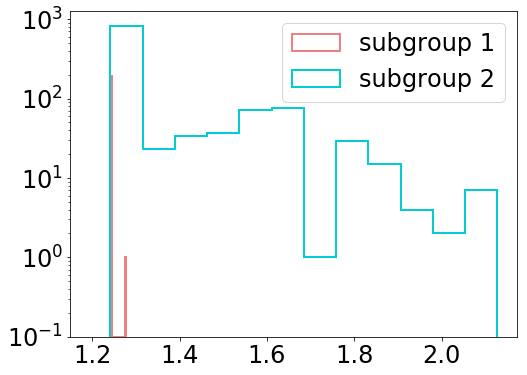

In [17]:
##Separate group 2 into two subgroups based on initial companion masses and porb

g2_m1_init = [[[],[]],[[],[]]]; g2_k1_init = [[[],[]],[[],[]]]
g2_m2_init = [[[],[]],[[],[]]]; g2_k2_init = [[[],[]],[[],[]]]
g2_porb_init = [[[],[]],[[],[]]]; g2_ecc_init = [[[],[]],[[],[]]]
g2_t_init = [[[],[]],[[],[]]]
g2_sn_init = [[[],[]],[[],[]]]; g2_names_init = [[[],[]],[[],[]]]


for xx in range(2):
    for ii in range(len(m1_init[xx][1])):
        if m2_init[xx][1][ii]<=1:
            g2_m1_init[xx][0].append(m1_init[xx][1][ii]); g2_k1_init[xx][0].append(k1_init[xx][1][ii])
            g2_m2_init[xx][0].append(m2_init[xx][1][ii]); g2_k2_init[xx][0].append(k2_init[xx][1][ii])
            g2_porb_init[xx][0].append(porb_init[xx][1][ii]); g2_ecc_init[xx][0].append(ecc_init[xx][1][ii])
            g2_t_init[xx][0].append(t_init[xx][1][ii])
            g2_sn_init[xx][0].append(group_sn_ns[1][ii]); g2_names_init[xx][0].append(group_name[1][ii])
        else:
            g2_m1_init[xx][1].append(m1_init[xx][1][ii]); g2_k1_init[xx][1].append(k1_init[xx][1][ii])
            g2_m2_init[xx][1].append(m2_init[xx][1][ii]); g2_k2_init[xx][1].append(k2_init[xx][1][ii])
            g2_porb_init[xx][1].append(porb_init[xx][1][ii]); g2_ecc_init[xx][1].append(ecc_init[xx][1][ii])
            g2_t_init[xx][1].append(t_init[xx][1][ii])
            g2_sn_init[xx][1].append(group_sn_ns[1][ii]); g2_names_init[xx][1].append(group_name[1][ii])
        
            
print(len(g2_m1_init[0][0]), len(g2_m1_init[0][1]))
print(Counter(g2_sn_init[0][0]), Counter(g2_sn_init[0][1]))
print(Counter(g2_k2_init[0][0]), Counter(g2_k2_init[0][1]))
print(g2_names_init[0][0][5], g2_names_init[0][1][5])



cs = ['lightcoral', 'darkturquoise', 'gold']
labels = ['subgroup 1', 'subgroup 2','subgroup 3']
fig, axs = plt.subplots(figsize = (8, 6))
for n in range(2):
    axs.hist(g2_m1_init[0][n], log=True, bins = 12, histtype = 'step', lw = 2, 
                color = cs[n], label = labels[n])


#axs[0].set_xscale('log')
#axs[0].set_yscale('log')
#axs[0].set_xlim(xmin = 0.003)
#axs[0].set_ylim(ymin = 0.00005, ymax = 10**6)
#axs[0].set_xlabel(r'$M_{comp}\,(M_{\odot})$')
#axs[0].set_ylabel(r'$P_{orb}\,(days)$')

axs.set_xlim(xmin = 1.15)
axs.legend(loc='best')

In [8]:
##Extract giant collision and tidal capture 13+X bianries from
testpath = '/projects/b1095/syr904/cmc/cmc-mpi-tidalcapture/rvgrid/standard_models_tcon/test18_mpi1/8e5_rvgrid_0.6/'

prop_init, prop_finl, prop_des = tc.find_tc_properties_final(testpath)
print(len(prop_init['id0']), len(prop_finl['id0']), len(prop_des['id0']))


##Separate giant collisions and tidal captureindex_coll_bin = []
index_tc_bin = []
index_tc_des = []
index_coll_bin = []
index_coll_des = []

types_bin = prop_init['type']
for i in range(len(types_bin)):
    if types_bin[i] == 'SS_COLL_Giant': index_coll_bin.append(i)
    if types_bin[i] == 'SS_COLL_TC_P': index_tc_bin.append(i)
        
types_des = prop_des['type']
for i in range(len(types_des)):
    if types_des[i] == 'SS_COLL_Giant': index_coll_des.append(i)
    if types_des[i] == 'SS_COLL_TC_P': index_tc_des.append(i)
    
#index_coll = index_coll_bin+index_coll_des
#index_tc = index_tc_bin+index_tc_des

print(len(index_coll_bin), len(index_tc_bin))
print(len(index_coll_des), len(index_tc_des))


##Extract data from the collision file
collfile = testpath+'initial.collision.log'
colldata = scripts1.readcollfile(collfile)
#print(colldata)

all_sscoll = {'time':[], 'idm':[], 'id0':[], 'id1':[], 'mm':[], 'm0':[], 'm1':[], 'km':[], 'k0':[], 'k1':[], 
             'r0':[], 'r1':[], 'rclu':[], 'vinf':[], 'rperi':[], 'coll_mult':[]}
for k in range(len(colldata)):
    line = colldata[k].split()
    #print(line)
    if line[1]=='single-single':
        all_sscoll['time'].append(float(line[0]))
        all_sscoll['idm'].append(int(line[3])); all_sscoll['id0'].append(int(line[5])); all_sscoll['id1'].append(int(line[7]))
        all_sscoll['mm'].append(float(line[4])); all_sscoll['m0'].append(float(line[6])); all_sscoll['m1'].append(float(line[8]))
        all_sscoll['rclu'].append(float(line[9]))
        all_sscoll['km'].append(int(line[10])); all_sscoll['k0'].append(int(line[11])); all_sscoll['k1'].append(int(line[12]))
        all_sscoll['vinf'].append(float(line[14]))
        all_sscoll['r0'].append(float(line[15])); all_sscoll['r1'].append(float(line[16]))
        all_sscoll['rperi'].append(float(line[17])); all_sscoll['coll_mult'].append(float(line[18])) 
        

##Separate ss collisions into different categories
coll_des_id0 = np.take(prop_des['id0'], index_coll_des)
coll_des_id1 = np.take(prop_des['id1'], index_coll_des)

tc_des_id0 = np.take(prop_des['id0'], index_tc_des)
tc_des_id1 = np.take(prop_des['id1'], index_tc_des)

index_sticky = []; index_tccoll = []
index_gmerge = []; index_tde = []
index_bhns_tde = []
for k in range(len(all_sscoll['k0'])):
    if all_sscoll['id0'][k] in coll_des_id0:
        index_gmerge.append(k)
        index_tccoll.append(k)
    elif all_sscoll['id0'][k] in tc_des_id0:
        index_tde.append(k)
        index_tccoll.append(k)
    elif all_sscoll['coll_mult'][k]==1.:
        index_sticky.append(k)
        #if all_sscoll['k0'][k]>=13 or all_sscoll['k1'][k]>=13:
        #    print(all_sscoll['id0'][k], all_sscoll['id1'][k])
    #elif all_sscoll['k0'][k]>=13 or all_sscoll['k1'][k]>=13:
    #    index_tde.append(k)
    #elif (2<=all_sscoll['k0'][k]<=9 and all_sscoll['k0'][k]!=7) or (2<=all_sscoll['k1'][k]<=9 and all_sscoll['k1'][k]!=7):
    #    index_gmerge.append(k)
    #    print(all_sscoll['id0'][k], all_sscoll['id1'][k], all_sscoll['k0'][k], all_sscoll['k1'][k], all_sscoll['m0'][k],
    #         all_sscoll['m1'][k])
    
    else:
        index_bhns_tde.append(k)
                 
print(len(index_sticky), len(index_tccoll))
print(len(index_gmerge), len(index_tde))
print(len(index_bhns_tde))

##Check what are the others
other_id0 = np.take(all_sscoll['id0'], index_bhns_tde)
other_k0 = np.take(all_sscoll['k0'], index_bhns_tde)
other_k1 = np.take(all_sscoll['k1'], index_bhns_tde)

#print(other_k0, other_k1)

734 734 529
390 344
470 59
524 529
470 59
75


In [11]:
##Output 13+X binaries from the test model above

for ii in range(len(prop_finl['id0'])):
    if prop_finl['k0'][ii]==13:
        print(prop_init['time'][ii], prop_finl['id0'][ii], prop_finl['id1'][ii], 
              prop_finl['k0'][ii], prop_finl['k1'][ii], 
              prop_finl['m0'][ii], prop_finl['m1'][ii], 
              prop_finl['sma'][ii], prop_finl['ecc'][ii])
    if prop_finl['k1'][ii]==13:
        print(prop_init['time'][ii], prop_finl['id1'][ii], prop_finl['id0'][ii], 
              prop_finl['k1'][ii], prop_finl['k0'][ii], 
              prop_finl['m1'][ii], prop_finl['m0'][ii], 
              prop_finl['sma'][ii], prop_finl['ecc'][ii])

0.0681979 405549 405349 13 0 1.24 0.115 0.003394 0.0
0.310451 131427 101295 13 11 1.24 0.892 0.07161 0.0
5.15405 148824 130757 13 0 1.24 0.0919 0.005937 0.0
11.4394 371482 579158 13 7 1.43 0.517 0.01502 0.5008639692
11.4532 518154 781417 13 0 1.24 0.452 0.01218 0.0
12.1156 196981 848396 13 1 1.24 2.38 0.03775 0.0
12.1629 787083 264132 13 10 1.43 0.234 0.004885 0.0
12.2109 820901 185922 13 10 1.43 0.282 0.002968 0.8664031988
13.2709 30114 489452 13 1 1.69 0.673 0.01309 0.0
13.421 151325 432879 13 0 1.26 0.428 0.008418 0.0
13.4385 924813 786999 13 0 1.24 0.42 0.01302 0.0
13.6224 649428 34110 13 0 1.24 0.598 0.01281 0.0
13.6491 801359 925594 13 10 1.43 0.401 0.02908 0.0
13.8576 67719 934315 13 1 1.26 1.2 0.01655 0.0
13.8843 513747 1133003 13 7 1.24 0.501 0.006828 0.0
13.9745 360571 1257695 13 11 1.26 0.666 0.42 0.6681617825


[     0      4      5 ... 300746 300748 300749]
111109 111109
True
62 1372 1241
72
669


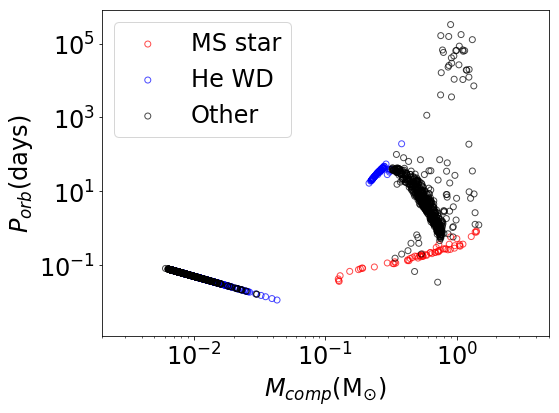

In [2]:
##Extract data from Rachel's population
##General COSMIC run
conv = pd.read_hdf('/projects/b1095/rczhang/dat_kstar1_13_kstar2_0_12_SFstart_10000.0_SFduration_10000.0_metallicity_0.014.h5', 
                   key='conv')
bcm = pd.read_hdf('/projects/b1095/rczhang/dat_kstar1_13_kstar2_0_12_SFstart_10000.0_SFduration_10000.0_metallicity_0.014.h5', 
                   key='bcm')
bpp = pd.read_hdf('/projects/b1095/rczhang/dat_kstar1_13_kstar2_0_12_SFstart_10000.0_SFduration_10000.0_metallicity_0.014.h5', 
                   key='bpp')

binname = bcm.index.values
print(binname)
print(len(binname), len(bcm))

k1 = np.array(bcm['kstar_2']); k0 = np.array(bcm['kstar_1'])
print(np.any(k1==13))
m0= np.array(bcm['mass_1']); m1 = np.array(bcm['mass_2'])
porb_cp = np.array(bcm['porb'])
B0 = np.array(bcm['B_1']); B1 = np.array(bcm['B_2'])
P0 = twopi*yearsc/np.array(bcm['omega_spin_1']); P1 = twopi*yearsc/np.array(bcm['omega_spin_2'])

msp_hewd = [[],[]]; msp_other = [[],[]]; msp_ms = [[],[]]
for ii in range(len(k0)):
    if k0[ii]==13:
        deathcut=P0[ii]**2*(0.17*10**12)
        if P0[ii]<=0.03 and B0[ii]> deathcut:
            if k1[ii]<=1:
                msp_ms[0].append(m1[ii]); msp_ms[1].append(porb_cp[ii])
            elif k1[ii]==10:
                msp_hewd[0].append(m1[ii]); msp_hewd[1].append(porb_cp[ii])
            else:
                msp_other[0].append(m1[ii]); msp_other[1].append(porb_cp[ii])
    elif k1[ii]==13:
        deathcut=P1[ii]**2*(0.17*10**12)
        if P1[ii]<=0.03 and B1[ii]> deathcut:
            if k0[ii]<=1:
                msp_ms[0].append(m0[ii]); msp_ms[1].append(porb_cp[ii])
            elif k0[ii]==10:
                msp_hewd[0].append(m0[ii]); msp_hewd[1].append(porb_cp[ii])
            else:
                msp_other[0].append(m0[ii]); msp_other[1].append(porb_cp[ii])

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(msp_ms[0], msp_ms[1], color = 'r', facecolors='none', alpha=0.7, label='MS star')
ax.scatter(msp_hewd[0], msp_hewd[1], color = 'b', facecolors='none', alpha=0.7, label='He WD')
ax.scatter(msp_other[0], msp_other[1], color = 'k', facecolors='none', alpha=0.7, label='Other')
ax.set_xlim(0.002, 5)
#ax.set_ylim(0.005, 1e9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M_{comp}\rm(M_{\odot})$')
ax.set_ylabel(r'$P_{orb}\rm{(days)}$')
ax.legend(loc='best')

print(len(msp_ms[0]), len(msp_hewd[0]), len(msp_other[0]))
print(len(np.array(msp_hewd[0])[np.array(msp_hewd[0])>0.1]))
print(len(np.array(msp_other[0])[np.array(msp_other[0])>0.1]))